In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("preprocessed_Rainfall_dataset.csv")

In [3]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [7]:
dataset.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

## Probability Density

<Axes: xlabel='humidity', ylabel='Density'>

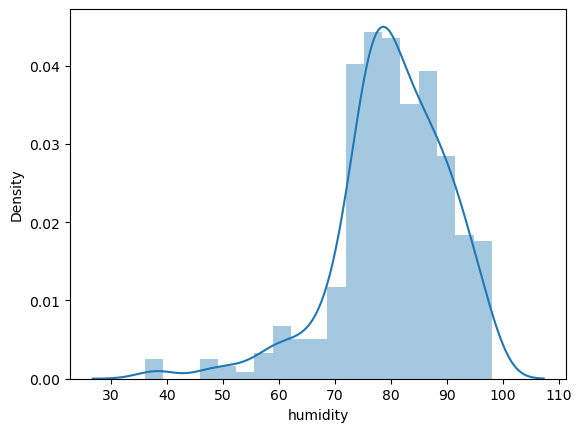

In [18]:
sns.distplot(dataset["humidity"])

In [20]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #Generate a sample
    sample=dataset
    # calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f'% (sample_mean,sample_std))
    # Define the Distribution
    dist=norm(sample_mean,sample_std)
    # sample probabilities for range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=80.178,Standard Deviation=10.062
The area between range(80,90):0.34984882810323875


0.34984882810323875

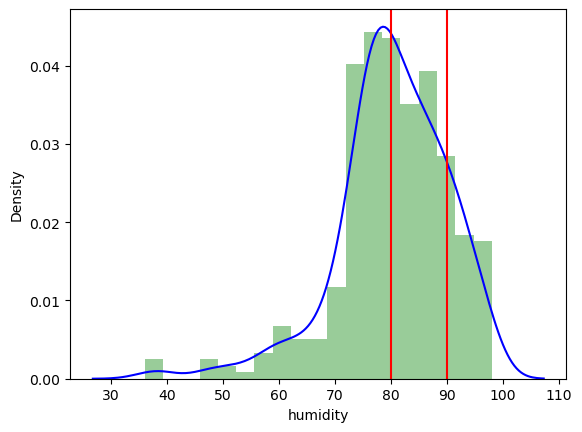

In [24]:
get_pdf_probability(dataset["humidity"],80,90)

## Cumulative Distribution Function

In [27]:
#! pip install statsmodels

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["humidity"])
ecdf(80)

0.5

## Standard Normal Distribution

In [32]:
def stdNBgraph (dataset):
    # Converted to standard normal distribution(z_score)
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=(dataset-mean)/std 
    #plot standardized histogram with KDE
    sns.histplot(z_score,kde=True,stat="density",bins=50)
    # Set correct X_axis range for standard normal distribution
    plt.xlim(-3,3)
    # show the plot
    plt.show()

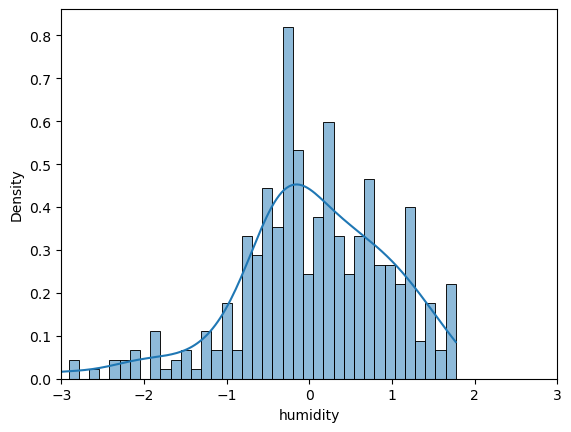

In [34]:
stdNBgraph (dataset["humidity"])